In [2]:
# Frequent Patterns: Combinations of Features that occur frequently in the dataset

# Apriori Algorithm
# FP-Growth Algorithm
# We can realize more about relationships between different features

# Steps:
#      Pre-Process, missing values, remove irrelevant
#      Encode Dataset, each row a specific format of accident ( ex binary ) and each columnt a featuer
#      Choose sutable FP-Growth, Apriori Algorithm
#      Setting Minimum Support Threshold: define the minimum occurance
#      Extract Patterns: run algorithm, filter result that support threshold, 
#                      => output: list of frequent itemsets or patterns, combination of features occur frequently
#      Post-Processing, Analysis: analyze extracted patterns, Explore Association Rules
#      Interpret and Visulization


In [3]:
# Frequent Item se in a dataset

# Frequent Itemset = Association Rules
# A frequent itemset = A set of items that occur together frequently in dataset
# Support Count = Number of occurance that set in dataset

# Association Rule Mining Algoirhtms = such as : Apriori, FP-Growth -> output = frequent itemset
# they are iteratively generation algorithm -> output : {left-hand set} -> {candidate set}
# confidence = Number of occurance candidate / Number of occurance left-hand set
# these algorithms work by on-off of an item

# applications: in cross-selling and recommendation systems

# it’s good to put them together in stores or provide some discount offer on 
# one item on purchase of another item


In [4]:
# Defenitions:

# Support = ex 5% support means 5% of all transactions follow this rule
# Support ( A -> B ) = Support ( people who buy A and B ) / Support_count ( All Transactions )

# Confidence ( A -> B ) = Support_count ( A U B ) / Support_count ( A )
# ex Confidence ( A -> B ) = 60% means: 
#     Support_count ( people who buy A and B ) / Support_count ( people who buy A )

# If a rule satisfy both minimum support and minimum confidence its a strong rule


# Support_count ( X ) : Number of transactions that X occur 
# Support_count ( X U Y ) : Number of transactions that X and Y occur
    
# Maximal Itemset : an itemset is maximal if none of its superset are frequent

# Closed Itemset : none of its immediate supersets have same support count same as itemset


# PROS:
#     efficient
#     easy to interpret
#     can be used in wide range of application: finance, healthcare
#     handing large dataset

# CONS:
#     large number of rules
#     limited in detecting complex relationships
#     computationally expensive
#     need to define minimum support and confidence threshold
    


In [5]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Load Dataset

abs_path = Path.cwd()
data_address = abs_path.parent.parent / 'data/' / 'Cleaned_US.csv'
df = pd.read_csv(data_address)

In [7]:
# pip install mlxtend

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [8]:
# One-Shot Encoding on dataset

te = TransactionEncoder()
te

TransactionEncoder()

In [9]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [10]:
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [11]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support          itemsets
0  0.071072        (Crossing)
1  0.102037        (Junction)
2  0.093829  (Traffic_Signal)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [12]:
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                    itemsets
0  0.071072                  (Crossing)
1  0.102037                  (Junction)
2  0.024013                   (Station)
3  0.093829            (Traffic_Signal)
4  0.038292  (Crossing, Traffic_Signal)

Association Rules:
        antecedents       consequents  antecedent support  consequent support  \
0        (Crossing)  (Traffic_Signal)            0.071072            0.093829   
1  (Traffic_Signal)        (Crossing)            0.093829            0.071072   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.038292    0.538784  5.742183  0.031624    1.964743       0.889036  
1  0.038292    0.408107  5.742183  0.031624    1.569420       0.911363  


In [13]:
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.007, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                    itemsets
0  0.009834                   (Amenity)
1  0.071072                  (Crossing)
2  0.102037                  (Junction)
3  0.007875                   (Railway)
4  0.024013                   (Station)
5  0.017672                      (Stop)
6  0.093829            (Traffic_Signal)
7  0.007370         (Station, Crossing)
8  0.038292  (Crossing, Traffic_Signal)
9  0.007178   (Station, Traffic_Signal)

Association Rules:
        antecedents       consequents  antecedent support  consequent support  \
0         (Station)        (Crossing)            0.024013            0.071072   
1        (Crossing)         (Station)            0.071072            0.024013   
2        (Crossing)  (Traffic_Signal)            0.071072            0.093829   
3  (Traffic_Signal)        (Crossing)            0.093829            0.071072   
4         (Station)  (Traffic_Signal)            0.024013            0.093829   
5  (Traffic_Signal)         (Statio

In [14]:
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.003, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
     support                             itemsets
0   0.009834                            (Amenity)
1   0.071072                           (Crossing)
2   0.102037                           (Junction)
3   0.007875                            (Railway)
4   0.024013                            (Station)
5   0.017672                               (Stop)
6   0.093829                     (Traffic_Signal)
7   0.003677                  (Amenity, Crossing)
8   0.003514            (Amenity, Traffic_Signal)
9   0.005302                  (Crossing, Railway)
10  0.007370                  (Station, Crossing)
11  0.004208                     (Crossing, Stop)
12  0.038292           (Crossing, Traffic_Signal)
13  0.007178            (Station, Traffic_Signal)
14  0.003776  (Station, Traffic_Signal, Crossing)

Association Rules:
                   antecedents                 consequents  \
0                    (Amenity)                  (Crossing)   
1                   (Crossing)       

In [15]:
# Abnormaly Acts
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.0005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
     support                                      itemsets
0   0.009834                                     (Amenity)
1   0.071072                                    (Crossing)
2   0.002402                                    (Give_Way)
3   0.102037                                    (Junction)
4   0.001524                                     (No_Exit)
5   0.007875                                     (Railway)
6   0.024013                                     (Station)
7   0.017672                                        (Stop)
8   0.000606                             (Traffic_Calming)
9   0.093829                              (Traffic_Signal)
10  0.003677                           (Amenity, Crossing)
11  0.002097                            (Amenity, Station)
12  0.000519                               (Amenity, Stop)
13  0.003514                     (Amenity, Traffic_Signal)
14  0.000845                          (Give_Way, Crossing)
15  0.000989                         

In [26]:
frequent_itemsets.sort_values('support',ascending=False)

,support,itemsets
3,0.102037,(Junction)
9,0.093829,(Traffic_Signal)
1,0.071072,(Crossing)
20,0.038292,"(Crossing, Traffic_Signal)"
6,0.024013,(Station)
7,0.017672,(Stop)
0,0.009834,(Amenity)
5,0.007875,(Railway)
18,0.007370,"(Station, Crossing)"
27,0.007178,"(Station, Traffic_Signal)"


In [27]:
rules.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(Crossing),(Traffic_Signal),0.071072,0.093829,0.038292,0.538784,5.742183,0.031624,1.964743,0.889036
19,(Traffic_Signal),(Crossing),0.093829,0.071072,0.038292,0.408107,5.742183,0.031624,1.569420,0.911363
15,(Crossing),(Station),0.071072,0.024013,0.007370,0.103705,4.318628,0.005664,1.088912,0.827238
14,(Station),(Crossing),0.024013,0.071072,0.007370,0.306933,4.318628,0.005664,1.340314,0.787352
29,(Traffic_Signal),(Station),0.093829,0.024013,0.007178,0.076505,3.185928,0.004925,1.056840,0.757164
...,...,...,...,...,...,...,...,...,...,...
80,"(Railway, Traffic_Signal)",(Station),0.002148,0.024013,0.000524,0.243792,10.152326,0.000472,1.290632,0.903441
79,"(Station, Traffic_Signal)",(Railway),0.007178,0.007875,0.000524,0.072953,9.263748,0.000467,1.070199,0.898502
78,"(Station, Railway)",(Traffic_Signal),0.001628,0.093829,0.000524,0.321602,3.427533,0.000371,1.335752,0.709400
5,(Stop),(Amenity),0.017672,0.009834,0.000519,0.029348,2.984268,0.000345,1.020104,0.676871


In [28]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
62,"(Railway, Traffic_Signal)",(Crossing),0.002148,0.071072,0.001937,0.901510,12.684500,0.001784,9.431707,0.923147
85,"(Amenity, Station, Crossing)",(Traffic_Signal),0.000990,0.093829,0.000705,0.712050,7.588788,0.000612,3.146968,0.869087
48,"(Give_Way, Crossing)",(Traffic_Signal),0.000845,0.093829,0.000593,0.701066,7.471731,0.000513,3.031342,0.866895
13,(Railway),(Crossing),0.007875,0.071072,0.005302,0.673318,9.473775,0.004743,2.843525,0.901545
84,"(Amenity, Station, Traffic_Signal)",(Crossing),0.001100,0.071072,0.000705,0.640891,9.017520,0.000627,2.586760,0.890084
...,...,...,...,...,...,...,...,...,...,...
71,(Crossing),"(Station, Stop)",0.071072,0.000984,0.000565,0.007952,8.081392,0.000495,1.007023,0.943301
96,(Traffic_Signal),"(Amenity, Station, Crossing)",0.093829,0.000990,0.000705,0.007513,7.588788,0.000612,1.006573,0.958127
10,(Crossing),(No_Exit),0.071072,0.001524,0.000530,0.007460,4.895313,0.000422,1.005980,0.856603
53,(Traffic_Signal),"(Give_Way, Crossing)",0.093829,0.000845,0.000593,0.006315,7.471731,0.000513,1.005505,0.955849


In [29]:
# Convert weather float columns to categorical
weather_float_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                         'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Define the thresholds for each weather column
thresholds = {
    'Temperature(F)': [0, 32, 70, float('inf')],
    'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
    'Humidity(%)': [0, 40, 70, 100],
    'Pressure(in)': [0, 29.5, 30, float('inf')],
    'Visibility(mi)': [0, 2, 5, float('inf')],
    'Wind_Speed(mph)': [0, 5, 10, float('inf')],
    'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
}

# Discretize and encode weather columns using one-hot encoding
for column in weather_float_columns:
    bins = thresholds[column]
    labels = range(len(bins) - 1)
    categories = pd.cut(df[column], bins=bins, labels=labels)
    encoded_cols = pd.get_dummies(categories, prefix=column)
    df = pd.concat([df, encoded_cols], axis=1)

# Drop the original weather float columns
df.drop(weather_float_columns, axis=1, inplace=True)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774575 entries, 0 to 2774574
Data columns (total 48 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Severity             int64  
 1   Start_Time           object 
 2   Start_Lat            float64
 3   Start_Lng            float64
 4   End_Lat              float64
 5   End_Lng              float64
 6   Distance(mi)         float64
 7   City                 object 
 8   County               object 
 9   State                object 
 10  Weather_Condition    object 
 11  Amenity              int64  
 12  Bump                 int64  
 13  Crossing             int64  
 14  Give_Way             int64  
 15  Junction             int64  
 16  No_Exit              int64  
 17  Railway              int64  
 18  Roundabout           int64  
 19  Station              int64  
 20  Stop                 int64  
 21  Traffic_Calming      int64  
 22  Traffic_Signal       int64  
 23  Turning_Loop         int64  
 24

In [37]:
df

,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,County,State,...,Pressure(in)_2,Visibility(mi)_0,Visibility(mi)_1,Visibility(mi)_2,Wind_Speed(mph)_0,Wind_Speed(mph)_1,Wind_Speed(mph)_2,Precipitation(in)_0,Precipitation(in)_1,Precipitation(in)_2
0,3,2016-02-08 00:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Dublin,Franklin,OH,...,0,0,0,1,0,0,1,0,0,0
1,2,2016-02-08 05:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,Dayton,Montgomery,OH,...,0,0,0,1,0,1,0,0,1,0
2,2,2016-02-08 06:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,Cincinnati,Hamilton,OH,...,0,0,0,1,0,1,0,0,1,0
3,2,2016-02-08 06:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,Akron,Summit,OH,...,0,0,0,1,0,1,0,1,0,0
4,3,2016-02-08 07:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,Cincinnati,Hamilton,OH,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774570,2,2021-07-19 16:15:41,25.953810,-80.205651,25.942621,-80.205285,0.773,Miami,Miami-Dade,FL,...,1,0,0,1,0,0,1,0,0,0
2774571,2,2021-12-16 21:54:00,38.426953,-120.588087,38.426690,-120.587706,0.027,Pioneer,Amador,CA,...,0,0,0,1,0,0,1,0,0,0
2774572,2,2021-12-12 16:12:00,39.750573,-84.191238,39.749632,-84.190979,0.066,Dayton,Montgomery,OH,...,0,0,0,1,0,0,1,0,0,0
2774573,2,2021-05-01 11:28:00,39.754339,-84.192260,39.753289,-84.191977,0.074,Dayton,Montgomery,OH,...,0,0,0,1,0,0,1,0,0,0


In [38]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df[weather_float_columns], min_support=0.7, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support            itemsets
0  0.753698   (Wind_Chill(F)_2)
1  0.899235  (Visibility(mi)_2)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [39]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df[weather_float_columns], min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                             itemsets
0  0.753698                    (Wind_Chill(F)_2)
1  0.899235                   (Visibility(mi)_2)
2  0.697797  (Wind_Chill(F)_2, Visibility(mi)_2)

Association Rules:
          antecedents         consequents  antecedent support  \
0   (Wind_Chill(F)_2)  (Visibility(mi)_2)            0.753698   
1  (Visibility(mi)_2)   (Wind_Chill(F)_2)            0.899235   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.899235  0.697797    0.925831  1.029576  0.020045    1.358587   
1            0.753698  0.697797    0.775990  1.029576  0.020045    1.099511   

   zhangs_metric  
0       0.116631  
1       0.285085  


In [40]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df[weather_float_columns], min_support=0.5, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                             itemsets
0  0.562669                   (Temperature(F)_1)
1  0.753698                    (Wind_Chill(F)_2)
2  0.899235                   (Visibility(mi)_2)
3  0.697797  (Wind_Chill(F)_2, Visibility(mi)_2)

Association Rules:
          antecedents         consequents  antecedent support  \
0   (Wind_Chill(F)_2)  (Visibility(mi)_2)            0.753698   
1  (Visibility(mi)_2)   (Wind_Chill(F)_2)            0.899235   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.899235  0.697797    0.925831  1.029576  0.020045    1.358587   
1            0.753698  0.697797    0.775990  1.029576  0.020045    1.099511   

   zhangs_metric  
0       0.116631  
1       0.285085  


In [41]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df[weather_float_columns], min_support=0.4, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                              itemsets
0  0.562669                    (Temperature(F)_1)
1  0.753698                     (Wind_Chill(F)_2)
2  0.442223                       (Humidity(%)_2)
3  0.442223                       (Humidity(%)_2)
4  0.899235                    (Visibility(mi)_2)
5  0.421931                   (Wind_Speed(mph)_1)
6  0.495006  (Visibility(mi)_2, Temperature(F)_1)
7  0.697797   (Wind_Chill(F)_2, Visibility(mi)_2)
8  0.442223                       (Humidity(%)_2)

Association Rules:
          antecedents         consequents  antecedent support  \
0   (Wind_Chill(F)_2)  (Visibility(mi)_2)            0.753698   
1  (Visibility(mi)_2)   (Wind_Chill(F)_2)            0.899235   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.899235  0.697797    0.925831  1.029576  0.020045    1.358587   
1            0.753698  0.697797    0.775990  1.029576  0.020045    1.099511   

   zhangs_metric  
0       

In [42]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df[weather_float_columns], min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
     support                                           itemsets
0   0.562669                                 (Temperature(F)_1)
1   0.363661                                 (Temperature(F)_2)
2   0.753698                                  (Wind_Chill(F)_2)
3   0.386941                                    (Humidity(%)_1)
4   0.442223                                    (Humidity(%)_2)
5   0.320209                                   (Pressure(in)_0)
6   0.386941                                    (Humidity(%)_1)
7   0.442223                                    (Humidity(%)_2)
8   0.899235                                 (Visibility(mi)_2)
9   0.421931                                (Wind_Speed(mph)_1)
10  0.386371                (Wind_Chill(F)_2, Temperature(F)_1)
11  0.495006               (Visibility(mi)_2, Temperature(F)_1)
12  0.363661                (Temperature(F)_2, Wind_Chill(F)_2)
13  0.351673               (Temperature(F)_2, Visibility(mi)_2)
14  0.308532         

In [43]:
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
8,0.899235,(Visibility(mi)_2)
2,0.753698,(Wind_Chill(F)_2)
16,0.697797,"(Wind_Chill(F)_2, Visibility(mi)_2)"
0,0.562669,(Temperature(F)_1)
11,0.495006,"(Visibility(mi)_2, Temperature(F)_1)"
4,0.442223,(Humidity(%)_2)
20,0.442223,(Humidity(%)_2)
7,0.442223,(Humidity(%)_2)
9,0.421931,(Wind_Speed(mph)_1)
3,0.386941,(Humidity(%)_1)


In [45]:
rules.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(Wind_Chill(F)_2),(Visibility(mi)_2),0.753698,0.899235,0.697797,0.925831,1.029576,0.020045,1.358587,0.116631
7,(Visibility(mi)_2),(Wind_Chill(F)_2),0.899235,0.753698,0.697797,0.775990,1.029576,0.020045,1.099511,0.285085
13,(Wind_Speed(mph)_1),(Visibility(mi)_2),0.421931,0.899235,0.383989,0.910074,1.012053,0.004573,1.120524,0.020602
12,(Visibility(mi)_2),(Wind_Speed(mph)_1),0.899235,0.421931,0.383989,0.427017,1.012053,0.004573,1.008875,0.118188
10,(Visibility(mi)_2),(Humidity(%)_1),0.899235,0.386941,0.380756,0.423422,1.094280,0.032805,1.063271,0.855034
11,(Humidity(%)_1),(Visibility(mi)_2),0.386941,0.899235,0.380756,0.984015,1.094280,0.032805,6.303857,0.140537
0,(Temperature(F)_2),(Wind_Chill(F)_2),0.363661,0.753698,0.363661,1.000000,1.326791,0.089570,inf,0.387061
1,(Wind_Chill(F)_2),(Temperature(F)_2),0.753698,0.363661,0.363661,0.482502,1.326791,0.089570,1.229645,1.000000
19,(Visibility(mi)_2),"(Temperature(F)_2, Wind_Chill(F)_2)",0.899235,0.363661,0.351673,0.391080,1.075398,0.024656,1.045029,0.695796
18,(Wind_Chill(F)_2),"(Temperature(F)_2, Visibility(mi)_2)",0.753698,0.351673,0.351673,0.466597,1.326791,0.086618,1.215453,1.000000


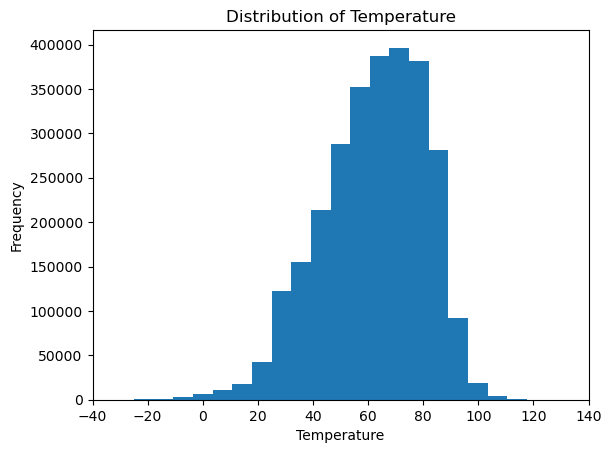

In [107]:
# Analys best cuts for features
# Temperature(F)

temperature_data = df['Temperature(F)']

# Plot distribution
plt.hist(temperature_data, bins=40)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.xlim(-40,140)
plt.title('Distribution of Temperature')
plt.savefig('Distribution of Temperature')
# 50, 90

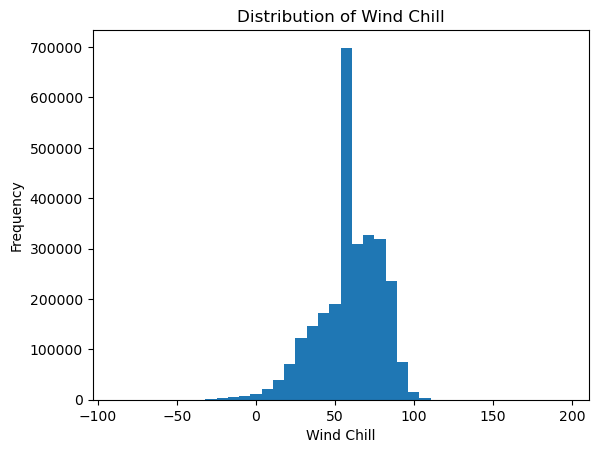

In [73]:
# Analys best cuts for features
# Wind_Chill(F)

wind_chill_data = df['Wind_Chill(F)']

# Plot distribution
plt.hist(wind_chill_data, bins=40)
plt.xlabel('Wind Chill')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Chill')
plt.savefig('Distribution of Wind Chill')

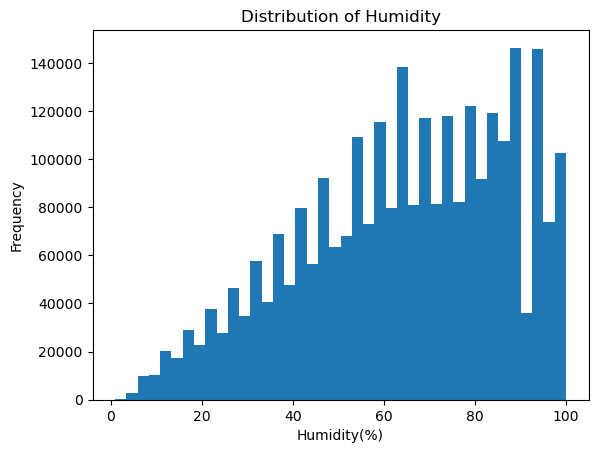

In [74]:
# Analys best cuts for features
# Humidity(%)

humidity_data = df['Humidity(%)']

# Plot distribution
plt.hist(humidity_data, bins=40)
plt.xlabel('Humidity(%)')
plt.ylabel('Frequency')
plt.title('Distribution of Humidity')
plt.savefig('Distribution of Humidity')

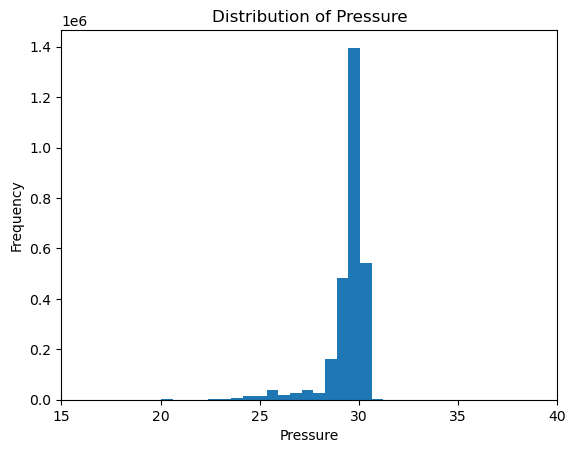

In [105]:
# Analys best cuts for features
# Pressure(in)

pressure_data = df['Pressure(in)']

# Plot distribution
plt.hist(pressure_data, bins=100)
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.xlim(15,40)
plt.title('Distribution of Pressure')
plt.savefig('Distribution of Pressure')

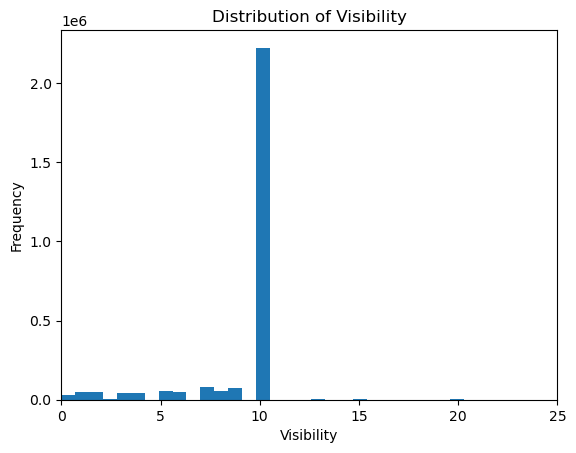

In [101]:
# Analys best cuts for features
# Visibility(mi)

visibility_data = df['Visibility(mi)']

# Plot distribution
plt.hist(visibility_data, bins=200)
plt.xlabel('Visibility')
plt.ylabel('Frequency')
plt.xlim(0,25)
plt.title('Distribution of Visibility')
plt.savefig('Distribution of Visibility')

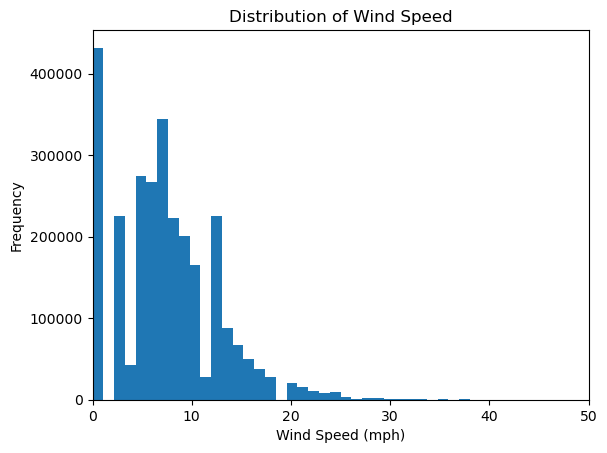

In [91]:
# Analyze best cuts for features
# Wind_Speed(mph)

wind_speed_data = df['Wind_Speed(mph)']

# Plot distribution
plt.hist(wind_speed_data, bins=1000)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed')
plt.xlim(0,50)
plt.savefig('Wind_Speed_Distribution.png')


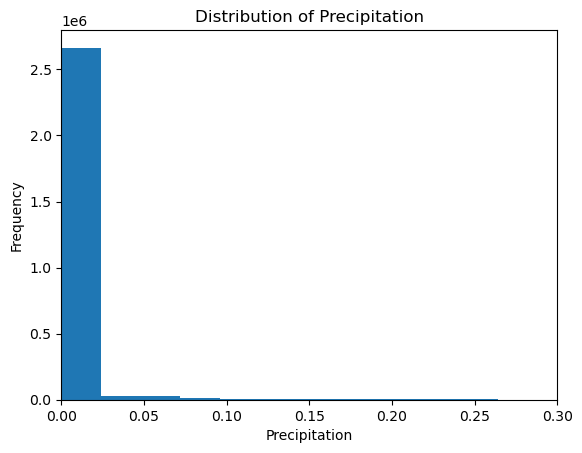

In [98]:
# Analys best cuts for features
# Percipitation(in)

temperature_data = df['Precipitation(in)']

# Plot distribution
plt.hist(temperature_data, bins=1000)
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.xlim(0,0.3)
plt.title('Distribution of Precipitation')
plt.savefig('Distribution of Precipitation')

In [109]:
# With new threshold

In [113]:
# Convert weather float columns to categorical
weather_float_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                         'Visibility(mi)', 'Wind_Speed(mph)']

# Define the thresholds for each weather column
thresholds = {
    'Temperature(F)': [0, 50, 90, float('inf')],
    'Wind_Chill(F)': [-float('inf'), 40, 80, float('inf')],
    'Humidity(%)': [0, 50, 85, 100],
    'Pressure(in)': [0, 29, 31, float('inf')],
    'Visibility(mi)': [0, 4, 8, float('inf')],
    'Wind_Speed(mph)': [0, 9, 18, float('inf')],
}

# Discretize and encode weather columns using one-hot encoding
for column in weather_float_columns:
    bins = thresholds[column]
    labels = range(len(bins) - 1)
    categories = pd.cut(df[column], bins=bins, labels=labels)
    encoded_cols = pd.get_dummies(categories, prefix=column)
    df = pd.concat([df, encoded_cols], axis=1)

# Drop the original weather float columns
df.drop(weather_float_columns, axis=1, inplace=True)


In [115]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df[weather_float_columns], min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)



/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
     support                                           itemsets
0   0.702976                                 (Temperature(F)_1)
1   0.703601                                  (Wind_Chill(F)_1)
2   0.503205                                    (Humidity(%)_1)
3   0.503205                                    (Humidity(%)_1)
4   0.832824                                 (Visibility(mi)_2)
5   0.555647                                (Wind_Speed(mph)_0)
6   0.594451                (Wind_Chill(F)_1, Temperature(F)_1)
7   0.361320                  (Humidity(%)_1, Temperature(F)_1)
8   0.361320                  (Humidity(%)_1, Temperature(F)_1)
9   0.605442               (Visibility(mi)_2, Temperature(F)_1)
10  0.398343              (Wind_Speed(mph)_0, Temperature(F)_1)
11  0.348205                   (Wind_Chill(F)_1, Humidity(%)_1)
12  0.348205                   (Wind_Chill(F)_1, Humidity(%)_1)
13  0.587697                (Wind_Chill(F)_1, Visibility(mi)_2)
14  0.403597         

In [116]:
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
4,0.832824,(Visibility(mi)_2)
1,0.703601,(Wind_Chill(F)_1)
0,0.702976,(Temperature(F)_1)
9,0.605442,"(Visibility(mi)_2, Temperature(F)_1)"
6,0.594451,"(Wind_Chill(F)_1, Temperature(F)_1)"
13,0.587697,"(Wind_Chill(F)_1, Visibility(mi)_2)"
5,0.555647,(Wind_Speed(mph)_0)
15,0.503205,(Humidity(%)_1)
2,0.503205,(Humidity(%)_1)
3,0.503205,(Humidity(%)_1)


In [117]:
rules.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Visibility(mi)_2),(Temperature(F)_1),0.832824,0.702976,0.605442,0.726975,1.034139,0.019987,1.087901,0.197470
5,(Temperature(F)_1),(Visibility(mi)_2),0.702976,0.832824,0.605442,0.861256,1.034139,0.019987,1.204924,0.111144
0,(Wind_Chill(F)_1),(Temperature(F)_1),0.703601,0.702976,0.594451,0.844869,1.201846,0.099836,1.914669,0.566624
1,(Temperature(F)_1),(Wind_Chill(F)_1),0.702976,0.703601,0.594451,0.845620,1.201846,0.099836,1.919933,0.565432
8,(Wind_Chill(F)_1),(Visibility(mi)_2),0.703601,0.832824,0.587697,0.835270,1.002938,0.001721,1.014852,0.009882
9,(Visibility(mi)_2),(Wind_Chill(F)_1),0.832824,0.703601,0.587697,0.705668,1.002938,0.001721,1.007023,0.017521
21,(Temperature(F)_1),"(Wind_Chill(F)_1, Visibility(mi)_2)",0.702976,0.587697,0.502047,0.714174,1.215207,0.088910,1.442495,0.596232
20,(Visibility(mi)_2),"(Wind_Chill(F)_1, Temperature(F)_1)",0.832824,0.594451,0.502047,0.602825,1.014087,0.006974,1.021085,0.083097
19,(Wind_Chill(F)_1),"(Visibility(mi)_2, Temperature(F)_1)",0.703601,0.605442,0.502047,0.713540,1.178543,0.076057,1.377355,0.511116
18,"(Visibility(mi)_2, Temperature(F)_1)",(Wind_Chill(F)_1),0.605442,0.703601,0.502047,0.829224,1.178543,0.076057,1.735598,0.383960


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774575 entries, 0 to 2774574
Data columns (total 48 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Severity             int64  
 1   Start_Time           object 
 2   Start_Lat            float64
 3   Start_Lng            float64
 4   End_Lat              float64
 5   End_Lng              float64
 6   Distance(mi)         float64
 7   City                 object 
 8   County               object 
 9   State                object 
 10  Weather_Condition    object 
 11  Amenity              int64  
 12  Bump                 int64  
 13  Crossing             int64  
 14  Give_Way             int64  
 15  Junction             int64  
 16  No_Exit              int64  
 17  Railway              int64  
 18  Roundabout           int64  
 19  Station              int64  
 20  Stop                 int64  
 21  Traffic_Calming      int64  
 22  Traffic_Signal       int64  
 23  Turning_Loop         int64  
 24

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/m

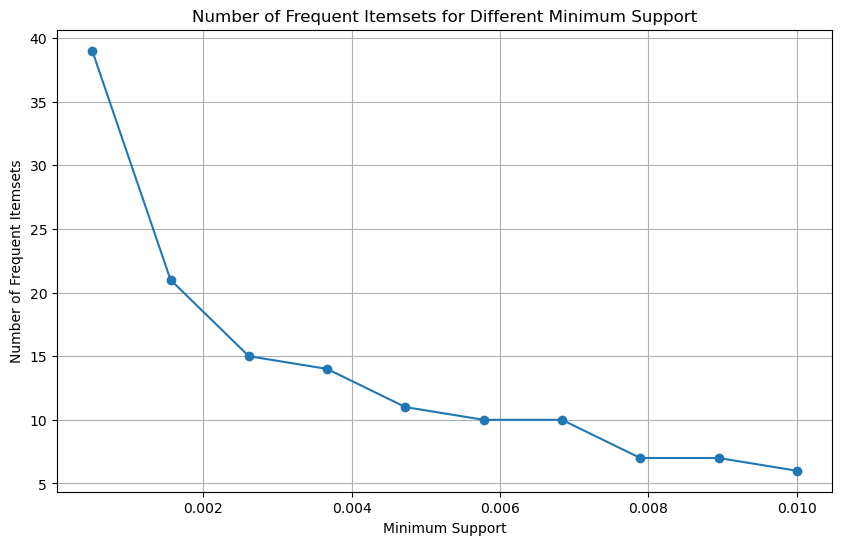

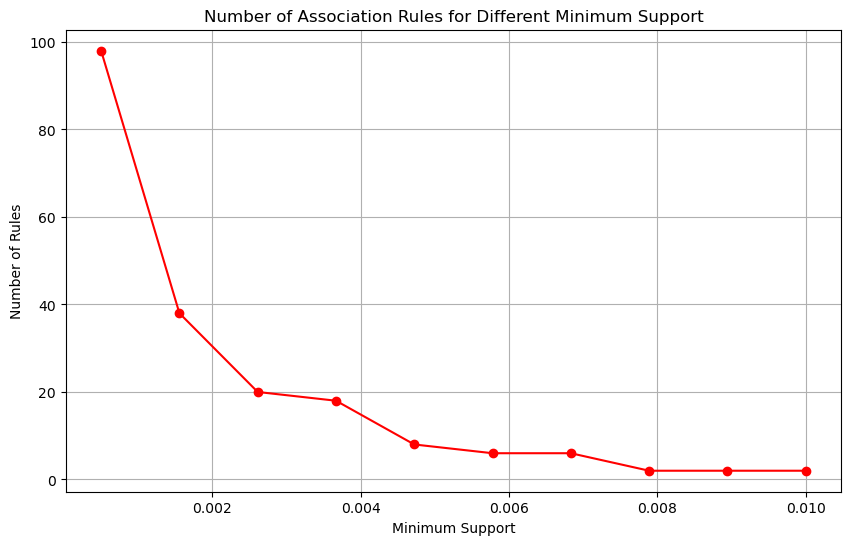

In [52]:
# Generate the minimum support values
min_support_values = np.linspace(0.0005, 0.01, num=10)

# Reverse the order of minimum support values
min_support_values = min_support_values[::-1]

num_frequent_itemsets = []
num_rules = []

for min_support in min_support_values:
    frequent_itemsets = apriori(df[bool_columns], min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    num_frequent_itemsets.append(len(frequent_itemsets))
    num_rules.append(len(rules))
    
# Plot number of frequent itemsets
plt.figure(figsize=(10, 6))
plt.plot(min_support_values, num_frequent_itemsets, marker='o')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Number of Frequent Itemsets for Different Minimum Support')
plt.grid(True)
plt.savefig('frequent_itemsets_plot_traffic_sign.png')
plt.show()


# Plot number of rules
plt.figure(figsize=(10, 6))
plt.plot(min_support_values, num_rules, marker='o', color='r')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Rules')
plt.title('Number of Association Rules for Different Minimum Support')
plt.grid(True)
plt.savefig('rules_count_plot_traffic_sign.png')
plt.show()



/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/m

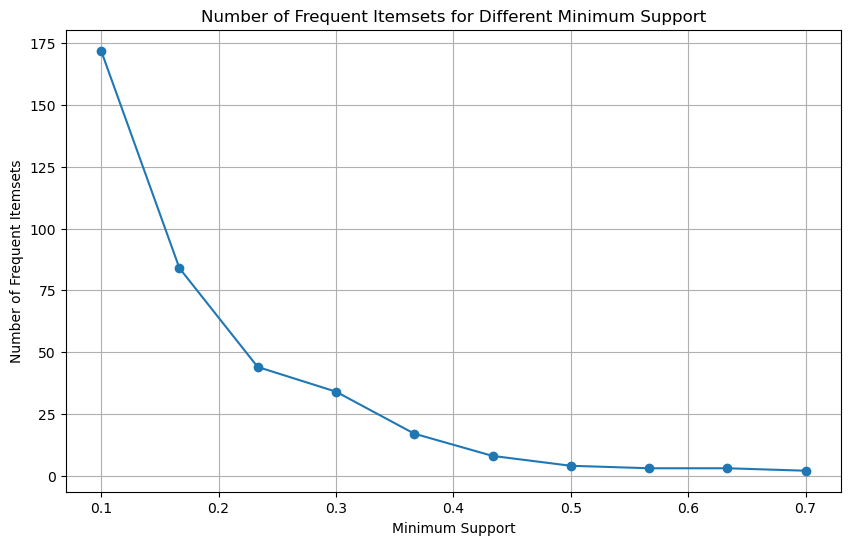

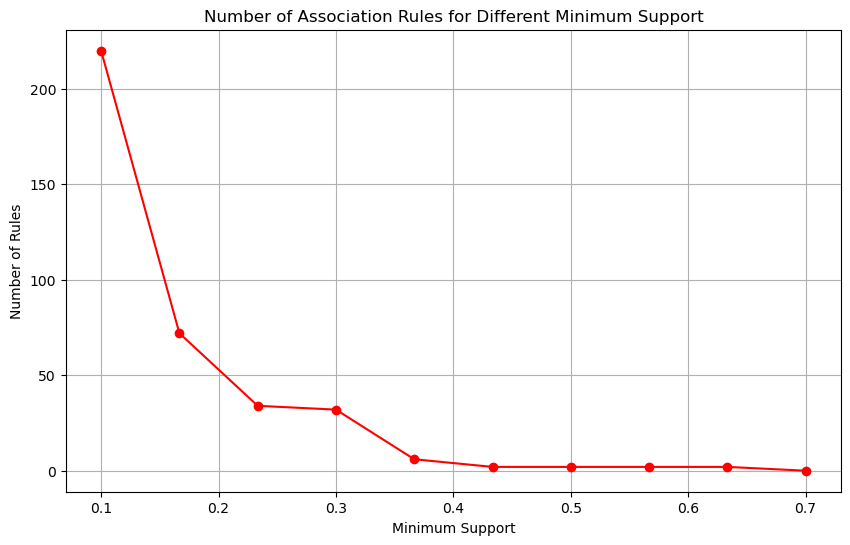

In [53]:
# Generate the minimum support values
min_support_values = np.linspace(0.1, 0.7, num=10)

# Reverse the order of minimum support values
min_support_values = min_support_values[::-1]

num_frequent_itemsets = []
num_rules = []

for min_support in min_support_values:
    frequent_itemsets = apriori(df[weather_float_columns], min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    num_frequent_itemsets.append(len(frequent_itemsets))
    num_rules.append(len(rules))
    
# Plot number of frequent itemsets
plt.figure(figsize=(10, 6))
plt.plot(min_support_values, num_frequent_itemsets, marker='o')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Number of Frequent Itemsets for Different Minimum Support')
plt.grid(True)
plt.savefig('frequent_itemsets_plot_weather_condition.png')
plt.show()

# Plot number of rules
plt.figure(figsize=(10, 6))
plt.plot(min_support_values, num_rules, marker='o', color='r')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Rules')
plt.title('Number of Association Rules for Different Minimum Support')
plt.grid(True)
plt.savefig('rules_count_plot_weather_condition.png')
plt.show()